<a href="https://colab.research.google.com/github/nicholasl33/ML-Data/blob/main/AD_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

In [6]:
# importing the data onto pandas
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv')

In [7]:
# display the first 5 of the dataframe
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
# looking for information of the dataframe, specifically for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [16]:
# dropping columns that weren't helpful for the algorithm
df.drop(['Timestamp'], axis = 1, inplace=True)

In [17]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [18]:
# dropping rows with na values within the columns
df.dropna(inplace=True)

In [19]:
# observing our new dataframe
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [30]:
# training the algorithm and testing 30% and training 70% 
x_train, x_test, y_train, y_test = train_test_split(df.drop('Clicked on Ad', axis=1), df['Clicked on Ad'], test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [33]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [34]:
prediction = logmodel.predict(x_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [37]:
# Return the mean accuracy on the given test data and labels.
print(logmodel.score(x_test,y_test))
# variable of the x test predictions
pp = logmodel.predict(x_test)
# adds up all the valeus that doesn't equal to 0 for the number of people who clicked on the ad
print("Clicked on Ad", sum(pp!=0))
# adds up all the valeus that does equal to 0 for the number of people who didnt click on the ad
print("Did NOT Click on Ad", sum(pp==0))

0.9266666666666666
Clicked on Ad 137
Did NOT Click on Ad 163


In [38]:
from sklearn import  metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



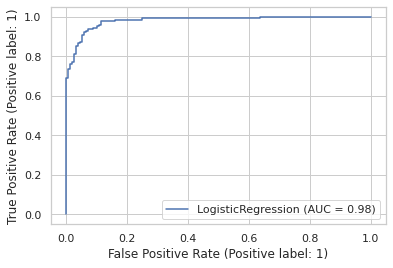

In [40]:
# plot the algorithm and shows the accuracy in terms of false positive vs true positive 
metrics.plot_roc_curve(logmodel, x_test, y_test)  

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

[[149   8]
 [ 14 129]]


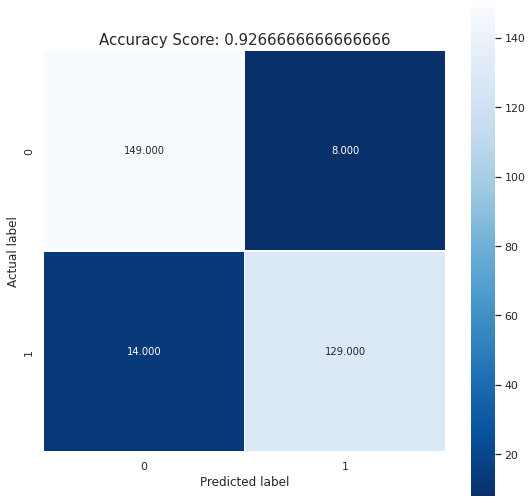

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

# Running the same algorithm but with 20:80 split




In [44]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Clicked on Ad', axis=1), df['Clicked on Ad'], test_size=0.2, random_state=101)

In [45]:
logmodel = LogisticRegression()

In [46]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [47]:
predict = logmodel.predict(x_test)

In [48]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       105
           1       0.93      0.88      0.91        95

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



In [49]:
# Return the mean accuracy on the given test data and labels.
print(logmodel.score(x_test,y_test))
# variable of the x test predictions
pp = logmodel.predict(x_test)
# adds up all the valeus that doesn't equal to 0 for the number of people who clicked on the ad
print("Clicked on Ad", sum(pp!=0))
# adds up all the valeus that does equal to 0 for the number of people who didnt click on the ad
print("Did NOT Click on Ad", sum(pp==0))

0.915
Clicked on Ad 90
Did NOT Click on Ad 110


# running the algorithm with a 10:90 split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Clicked on Ad', axis=1), df['Clicked on Ad'], test_size=0.1, random_state=101)

In [51]:
logmodel = LogisticRegression()

In [52]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [53]:
pred = logmodel.predict(x_test)

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        47
           1       0.96      0.85      0.90        53

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100



In [55]:
# Return the mean accuracy on the given test data and labels.
print(logmodel.score(x_test,y_test))
# variable of the x test predictions
pp = logmodel.predict(x_test)
# adds up all the valeus that doesn't equal to 0 for the number of people who clicked on the ad
print("Clicked on Ad", sum(pp!=0))
# adds up all the valeus that does equal to 0 for the number of people who didnt click on the ad
print("Did NOT Click on Ad", sum(pp==0))

0.9
Clicked on Ad 47
Did NOT Click on Ad 53
